## Objective for this Notebook
1. Learn about Convolution.
2. Leran Determining the Size of Output.
3. Learn Stride, Zero Padding

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

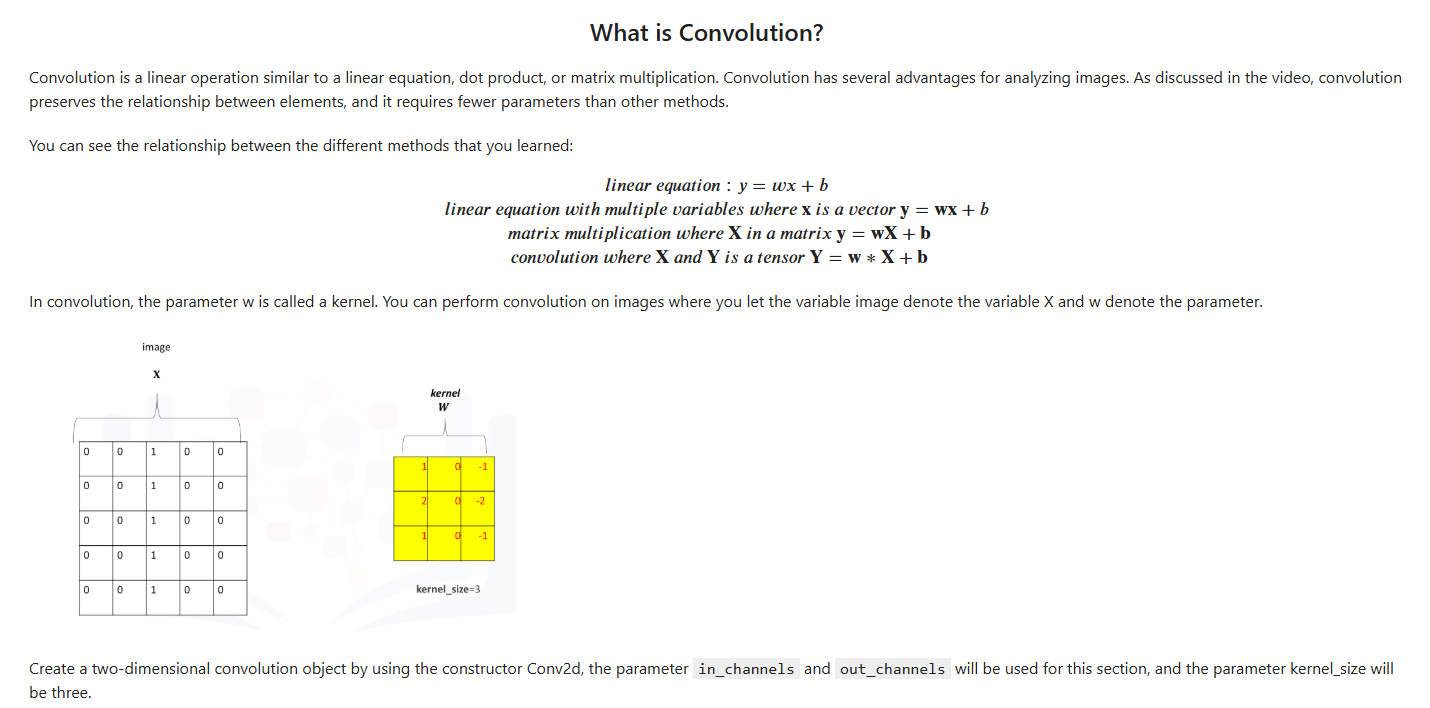

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1xw.png" width="500," align="center">

In [3]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [4]:
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.1719,  0.0783,  0.2691],
                        [ 0.1332,  0.3112, -0.2548],
                        [ 0.3051,  0.2409, -0.3000]]]])),
             ('bias', tensor([0.0878]))])

In [7]:
conv.state_dict()['weight'][0][0]

tensor([[ 0.1719,  0.0783,  0.2691],
        [ 0.1332,  0.3112, -0.2548],
        [ 0.3051,  0.2409, -0.3000]])

In [8]:
conv.state_dict()['weight'][0][0] = torch.tensor([[1.0,0,-1.0], [2.0,0,-2.0], [1.0,0.0,-1.0]])

In [9]:
conv.state_dict()['weight'][0][0]

tensor([[ 1.,  0., -1.],
        [ 2.,  0., -2.],
        [ 1.,  0., -1.]])

In [10]:
conv.state_dict()['bias'][0] = 0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [12]:
image = torch.zeros(1, 1, 5, 5) # number of inputs, number of channels, number of rows, number of columns
print(image)
image[0, 0, :, 2] = 1
print(image)

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])
tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])


In [13]:
z = conv(image)

In [14]:
print(z)

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1convltuon.gif" width="500," align="center">


<a id="ref1"></a>
<h2 align=center>Determining  the Size of the Output</h2>


The size of the output is an important parameter. In this lab, you will assume square images. For rectangular images, the same formula can be used in for each dimension independently.  

Let M be the size of the input and K be the size of the kernel. The size of the output is given by the following formula:

$$M_{new}=M-K+1$$

In [16]:
K = 2
conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=K)
conv1.state_dict()['weight'][0][0] = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
conv1.state_dict()['bias'][0] = 0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

In [17]:
M = 4
image1 = torch.ones(1, 1, M, M)

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1kernal2.png" width="500," align="center">

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1outsize.gif" width="500," align="center">

In [18]:
z1 = conv1(image1)
print("z1", z1)
print("shape: ", z1.shape[2:4])

z1 tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape:  torch.Size([3, 3])


<a id="ref2"></a>
<h2 align=center>Stride parameter</h2>

The parameter stride changes the number of shifts the kernel moves per iteration. As a result, the output size also changes and is given by the following formula:


$$M_{new}=\dfrac{M-K}{stride}+1$$

In [19]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=2)
conv3.state_dict()['weight'][0][0] = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
conv3.state_dict()['bias'][0] = 0.0
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

$$M_{new}=\dfrac{M-K}{stride}+1$$
$$M_{new}=\dfrac{4-2}{2}+1$$
$$M_{new}=2$$

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1stride2.gif" width="500," align="center">


In [20]:
z3 = conv3(image1)
print("z3", z3)
print("shape: ", z3.shape[2:4])

z3 tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape:  torch.Size([2, 2])


<a id='ref3'></a>
<h2 align=center>Zero Padding </h2>


In [21]:
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

$$M_{new}=\dfrac{M-K}{stride}+1$$
$$M_{new}=\dfrac{4-2}{3}+1$$
$$M_{new}=1.666$$

In [22]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=3)
conv4.state_dict()['weight'][0][0] = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
conv4.state_dict()['bias'][0] = 0.0
conv4.state_dict()
z4 = conv4(image1)
print("z4", z4)
print("shape: ", z4[2:4])

z4 tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)
shape:  tensor([], size=(0, 1, 1, 1), grad_fn=<SliceBackward0>)


$$M'=M+2 \times padding$$
$$M_{new}=M'-K+1$$


In [24]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=3, padding=1)
conv5.state_dict()['weight'][0][0] = torch.tensor([[1.0,1.0], [1.0,1.0]])
conv5.state_dict()['bias'][0] = 0.0
conv5.state_dict()
z5 = conv5(image1)
print("z5", z5)
print("shape: ", z5.shape[2:4])

z5 tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape:  torch.Size([2, 2])


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1zeropad.gif" width="500," align="center">

In [25]:
Image = torch.randn(1,1,4,4)
Image

tensor([[[[-0.1279, -1.0796,  0.2689,  0.1410],
          [ 0.4256,  1.1881, -0.8170,  0.8605],
          [ 0.3675, -0.1474, -0.9732, -0.2210],
          [-1.1709, -0.2419, -0.4264, -0.6419]]]])

In [27]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conv.state_dict()['weight'][0][0] = torch.tensor([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
conv.state_dict()['bias'][0] = 0.0
print(conv(Image))

tensor([[[[0., 0.],
          [0., 0.]]]], grad_fn=<ConvolutionBackward0>)
